# Datenanalyse 

In diesem Notebook sollen einige grundlegende Informationen über die Evaluationsdaten gesammelt werden.
Wie viele im Durchschnitt, wie viele Artikel ganz ohne Gendergrund. Die Folgende Werte sollen ermittelt werden: 
Anzahl der Artikel, Anzahl der Sätze, Anzahl maskuliner Nomen/Pronomen, Anzahl generischer Maskulina (True Positives), Singular vs. Plural-Verteilung, Nomen vs. Pronomen-Verteilung, Kasusverteilung, Morphologische Vielfalt (Lemma-Anzahl), Satzlängenverteilung. 

In [23]:
import pandas as pd
import numpy as np
import re
import spacy
from collections import defaultdict
from tqdm import tqdm

import matplotlib.pyplot as plt


# Enable tqdm in pandas
tqdm.pandas()
nlp = spacy.load("de_dep_news_trf")

In [24]:
df = pd.read_pickle('data_prepared_frame.pkl')


In [25]:
#Anzahl der Artikel
print('es sind: ' + str(len(df)) + ' Artikel enthalten')

#Anzahl der Sätze
total_sentences = df["Sentences_marked"].apply(len).sum()
print(f"Gesamtanzahl der Sätze: {total_sentences}")

#Enthaltene Maskulina
def count_masculins(text):
    if not isinstance(text, str):
        return 0
    
    matches = re.findall(r'(?:\!\-\-|\-\-)[^\s.,!?;:()\[\]{}<>"]+', text)
    return len(matches)
num_masculins = df["Text"].apply(count_masculins).sum()
print(f"Gesamtanzahl der Maskulinen Nomen und pronomen: {num_masculins}")

#Generische Maskulina
def count_generic_masculins(text):
    if not isinstance(text, str):
        return 0
    
    matches = re.findall(r'(?:\!\-\-)[^\s.,!?;:()\[\]{}<>"]+', text)
    return len(matches)
num_generic_masculins = df["Text"].apply(count_generic_masculins).sum()
print(f"Gesamtanzahl der generisch Maskulinen Nomen und pronomen: {num_generic_masculins}")


es sind: 2265 Artikel enthalten
Gesamtanzahl der Sätze: 47540
Gesamtanzahl der Maskulinen Nomen und pronomen: 84008
Gesamtanzahl der generisch Maskulinen Nomen und pronomen: 9119


Im Folgenden wird spacy für einige detailiertere Analysen verwendet

In [26]:
# Globale Zählung
global_counts = defaultdict(int)
global_lemmas = set()
line_counter = 0

def count_marked(text):
    global line_counter
    line_counter += 1
    doc = nlp(text)
    for token in doc:
        if token.text.startswith("--"):
            clean_text = token.text.strip('--')
            subdoc = nlp(clean_text)
            if len(subdoc) < 1:
                print("something weird", token, "in Article", line_counter)
                continue
            subtoken = subdoc[0]
            number = subtoken.morph.get("Number")
            case = subtoken.morph.get("Case")
            if number and case:
                key = f"{subtoken.pos_}_{number[0]}_{case[0]}"
                global_counts[key] += 1
                global_lemmas.add(subtoken.lemma_)
            else:
                print("missing info for:", subtoken.text, "in Article", line_counter)

# Anwendung auf alle Texte
df["Text"].progress_apply(count_marked)



  0%|                                                  | 0/2265 [00:00<?, ?it/s]/opt/anaconda3/envs/spacy310/lib/python3.10/site-packages/thinc/shims/pytorch.py:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self._mixed_precision):
  0%|                                          | 3/2265 [00:02<36:33,  1.03it/s]

missing info for: Abgeordneten in Article 3


  0%|                                          | 4/2265 [00:05<54:22,  1.44s/it]

missing info for: Abgeordneten in Article 3
missing info for: Göttinger in Article 4


  1%|▏                                        | 13/2265 [00:16<46:47,  1.25s/it]

missing info for: Abgeordneten in Article 12


  1%|▍                                        | 22/2265 [00:21<17:51,  2.09it/s]

missing info for: Abgeordneten in Article 21


  1%|▍                                        | 24/2265 [00:21<12:37,  2.96it/s]

missing info for: Arbeitnehmers in Article 24


  1%|▍                                        | 27/2265 [00:25<35:08,  1.06it/s]

missing info for: Moskauer in Article 27


  1%|▌                                        | 30/2265 [00:28<35:58,  1.04it/s]

missing info for: " in Article 29


  2%|▋                                        | 36/2265 [00:30<12:35,  2.95it/s]

missing info for: Arbeitnehmern in Article 36


  2%|▉                                        | 50/2265 [00:34<10:09,  3.63it/s]

missing info for: Einwohnern in Article 49


  4%|█▌                                       | 89/2265 [00:47<18:52,  1.92it/s]

missing info for: Brandenburger in Article 89
missing info for: Brandenburger in Article 89


  4%|█▋                                       | 91/2265 [00:50<26:36,  1.36it/s]

missing info for: Jedermann in Article 90


  4%|█▋                                       | 93/2265 [00:51<24:29,  1.48it/s]

missing info for: Arbeitnehmern in Article 94


  7%|██▊                                     | 156/2265 [01:11<10:34,  3.32it/s]

missing info for: jeder in Article 157


  7%|██▊                                     | 160/2265 [01:15<24:16,  1.45it/s]

missing info for: ihm in Article 159
missing info for: ihm in Article 159


  7%|██▉                                     | 166/2265 [01:20<31:37,  1.11it/s]

missing info for: ihn in Article 165


  9%|███▍                                    | 197/2265 [01:34<20:29,  1.68it/s]

missing info for: Essener in Article 196


 10%|███▉                                    | 226/2265 [01:43<08:16,  4.11it/s]

missing info for: Heimbewohner in Article 223


 11%|████▏                                   | 238/2265 [01:46<06:53,  4.91it/s]

missing info for: Vierte in Article 238


 15%|█████▉                                  | 338/2265 [02:42<16:38,  1.93it/s]

missing info for: Dresdener in Article 337
missing info for: Dresdener in Article 337


 17%|██████▊                                 | 387/2265 [02:57<09:41,  3.23it/s]

missing info for: Arbeitnehmern in Article 387


 18%|███████▍                                | 419/2265 [03:26<20:26,  1.50it/s]

missing info for: Jeder in Article 418


 19%|███████▋                                | 432/2265 [03:32<15:56,  1.92it/s]

missing info for: Arbeitnehmern in Article 431


 19%|███████▋                                | 435/2265 [03:34<17:27,  1.75it/s]

missing info for: Frankfurter in Article 434


 20%|███████▉                                | 447/2265 [03:43<24:44,  1.22it/s]

missing info for: Arbeitnehmern in Article 447


 20%|████████                                | 453/2265 [03:46<15:17,  1.98it/s]

missing info for: Einwohnern in Article 452


 21%|████████▏                               | 466/2265 [03:51<09:59,  3.00it/s]

missing info for: Arbeitnehmern in Article 465


 21%|████████▎                               | 474/2265 [03:54<08:43,  3.42it/s]

missing info for: Arbeitnehmern in Article 473


 22%|████████▋                               | 492/2265 [04:03<43:25,  1.47s/it]

missing info for: jeder in Article 492


 22%|████████▊                               | 502/2265 [04:13<22:51,  1.29it/s]

missing info for: den in Article 501


 23%|█████████                               | 515/2265 [04:21<16:27,  1.77it/s]

missing info for: Arbeitnehmern in Article 514


 26%|██████████▍                             | 591/2265 [04:54<18:04,  1.54it/s]

missing info for: Prager in Article 591
missing info for: anderen in Article 591


 26%|██████████▌                             | 599/2265 [05:08<34:12,  1.23s/it]

missing info for: Zuschauern in Article 599


 28%|███████████▏                            | 631/2265 [05:27<23:07,  1.18it/s]

missing info for: Lotsen in Article 631


 30%|███████████▊                            | 669/2265 [05:46<12:51,  2.07it/s]

missing info for: jeder in Article 668


 30%|███████████▉                            | 674/2265 [05:49<12:39,  2.09it/s]

missing info for: Einwohnern in Article 673


 31%|████████████▎                           | 697/2265 [05:57<08:25,  3.10it/s]

missing info for: jeder in Article 697


 32%|████████████▌                           | 714/2265 [06:12<17:11,  1.50it/s]

missing info for: einzelne in Article 714


 32%|████████████▋                           | 719/2265 [06:21<32:17,  1.25s/it]

missing info for: jeder in Article 718


 33%|█████████████▏                          | 746/2265 [06:34<09:00,  2.81it/s]

missing info for: Arbeitgebers in Article 745


 33%|█████████████▏                          | 747/2265 [06:34<08:14,  3.07it/s]

missing info for: Arbeitgebers in Article 747
missing info for: Arbeitnehmers in Article 747
missing info for: Arbeitnehmern in Article 747


 33%|█████████████▏                          | 748/2265 [06:35<12:03,  2.10it/s]

missing info for: Arbeitnehmern in Article 747


 34%|█████████████▊                          | 779/2265 [06:48<05:23,  4.60it/s]

missing info for: Münchener in Article 777


 35%|██████████████                          | 799/2265 [06:53<07:28,  3.27it/s]

missing info for: Asterix-Liebhaber in Article 798


 36%|██████████████▌                         | 823/2265 [07:03<24:50,  1.03s/it]

missing info for: Essigtrinkern in Article 823
missing info for: Kleinstwinzern in Article 823


 37%|██████████████▉                         | 849/2265 [07:33<18:44,  1.26it/s]

missing info for: Einwohnern in Article 848


 38%|███████████████                         | 851/2265 [07:35<18:20,  1.29it/s]

missing info for: Arbeitnehmern in Article 851


 38%|███████████████▏                        | 863/2265 [07:49<21:41,  1.08it/s]

missing info for: anderen in Article 862
missing info for: Arbeitnehmern in Article 863


 39%|███████████████▍                        | 876/2265 [08:03<13:24,  1.73it/s]

missing info for: Andalusier in Article 876


 39%|███████████████▌                        | 881/2265 [08:06<12:31,  1.84it/s]

missing info for: Frankfurter in Article 880


 40%|███████████████▉                        | 904/2265 [08:17<17:50,  1.27it/s]

missing info for: Jeder in Article 903


 42%|████████████████▋                       | 943/2265 [08:32<07:29,  2.94it/s]

missing info for: Arbeitnehmern in Article 943
missing info for: Arbeitnehmern in Article 943
missing info for: Arbeitgebers in Article 943
missing info for: Arbeitnehmern in Article 943
missing info for: Arbeitnehmern in Article 943


 42%|████████████████▋                       | 946/2265 [08:38<24:54,  1.13s/it]

missing info for: jeder in Article 946


 42%|████████████████▉                       | 961/2265 [08:51<17:54,  1.21it/s]

missing info for: jeder in Article 961


 43%|█████████████████▍                      | 985/2265 [09:06<10:04,  2.12it/s]

missing info for: Arbeitgebers in Article 984


 46%|█████████████████▉                     | 1040/2265 [09:30<20:25,  1.00s/it]

missing info for: Zuschauern in Article 1039
missing info for: Zuschauern in Article 1039


 46%|█████████████████▉                     | 1041/2265 [09:31<21:36,  1.06s/it]

missing info for: Einwohnern in Article 1040


 46%|██████████████████                     | 1049/2265 [09:35<16:31,  1.23it/s]

missing info for: wer in Article 1049


 47%|██████████████████▏                    | 1058/2265 [09:42<11:16,  1.78it/s]

missing info for: Alteigentümer in Article 1057
missing info for: Alteigentümer in Article 1057


 48%|██████████████████▌                    | 1079/2265 [09:54<09:13,  2.14it/s]

missing info for: Parlamentarier---Delegation in Article 1079


 48%|██████████████████▋                    | 1083/2265 [09:56<10:08,  1.94it/s]

missing info for: Privatvermittler in Article 1083


 50%|███████████████████▎                   | 1124/2265 [10:13<11:36,  1.64it/s]

missing info for: Niemand in Article 1123


 51%|███████████████████▊                   | 1149/2265 [10:27<14:02,  1.32it/s]

missing info for: Arbeitnehmern in Article 1148


 52%|████████████████████▍                  | 1186/2265 [10:51<13:20,  1.35it/s]

missing info for: Arbeitnehmern in Article 1185


 53%|████████████████████▌                  | 1196/2265 [10:54<06:32,  2.73it/s]

missing info for: jeder in Article 1195


 55%|█████████████████████▍                 | 1244/2265 [11:17<22:07,  1.30s/it]

missing info for: Erwachsene in Article 1243


 55%|█████████████████████▍                 | 1247/2265 [11:20<22:39,  1.34s/it]

missing info for: jeder in Article 1246


 55%|█████████████████████▌                 | 1250/2265 [11:24<19:05,  1.13s/it]

missing info for: Users in Article 1249


 56%|█████████████████████▋                 | 1263/2265 [11:33<08:49,  1.89it/s]

missing info for: Steuersparer in Article 1263


 56%|█████████████████████▊                 | 1264/2265 [11:34<10:04,  1.66it/s]

missing info for: Jeder in Article 1264


 56%|█████████████████████▊                 | 1269/2265 [11:37<09:42,  1.71it/s]

missing info for: Einwohnern in Article 1268


 57%|██████████████████████                 | 1282/2265 [11:43<07:55,  2.07it/s]

missing info for: anderen in Article 1281


 57%|██████████████████████▏                | 1289/2265 [11:46<07:00,  2.32it/s]

missing info for: Arbeitnehmern in Article 1289
missing info for: Arbeitnehmern in Article 1289


 59%|███████████████████████▏               | 1347/2265 [12:11<07:12,  2.12it/s]

missing info for: Arbeitnehmern in Article 1346


 60%|███████████████████████▏               | 1348/2265 [12:12<09:14,  1.65it/s]

missing info for: Alteigentümer in Article 1348


 60%|███████████████████████▏               | 1349/2265 [12:14<15:21,  1.01s/it]

missing info for: Alteigentümer in Article 1348
missing info for: Alteigentümer in Article 1348
missing info for: Alteigentümer in Article 1348
missing info for: ihm in Article 1349


 60%|███████████████████████▎               | 1351/2265 [12:16<16:43,  1.10s/it]

missing info for: Budapester in Article 1350


 60%|███████████████████████▎               | 1355/2265 [12:21<15:56,  1.05s/it]

missing info for: Einwohnern in Article 1355
missing info for: Einwohnern in Article 1355


 60%|███████████████████████▎               | 1356/2265 [12:22<17:04,  1.13s/it]

missing info for: Arbeitnehmern in Article 1355


 60%|███████████████████████▍               | 1359/2265 [12:28<25:43,  1.70s/it]

missing info for: ihm in Article 1358


 60%|███████████████████████▌               | 1368/2265 [12:36<11:48,  1.27it/s]

missing info for: Arbeitnehmern in Article 1367


 61%|███████████████████████▊               | 1384/2265 [12:44<04:48,  3.05it/s]

missing info for: Jeder in Article 1384


 63%|████████████████████████▋              | 1434/2265 [13:10<04:28,  3.09it/s]

missing info for: Wolfsburger in Article 1433


 65%|█████████████████████████▎             | 1473/2265 [13:27<10:32,  1.25it/s]

missing info for: den in Article 1473


 66%|█████████████████████████▊             | 1497/2265 [13:53<14:08,  1.10s/it]

missing info for: jeder in Article 1497


 67%|██████████████████████████▏            | 1524/2265 [14:10<06:42,  1.84it/s]

missing info for: Einwohnern in Article 1524


 70%|███████████████████████████▎           | 1588/2265 [14:36<09:19,  1.21it/s]

missing info for: Arbeitnehmern in Article 1588
missing info for: Arbeitnehmern in Article 1588


 70%|███████████████████████████▍           | 1590/2265 [14:39<10:22,  1.08it/s]

missing info for: Arbeitgebers in Article 1589
missing info for: Jeder in Article 1590


 70%|███████████████████████████▍           | 1591/2265 [14:41<14:34,  1.30s/it]

missing info for: Jeder in Article 1590


 70%|███████████████████████████▍           | 1594/2265 [14:44<12:33,  1.12s/it]

missing info for: Arbeitnehmern in Article 1594
missing info for: Arbeitnehmers in Article 1594
missing info for: Arbeitnehmern in Article 1594


 70%|███████████████████████████▍           | 1596/2265 [14:47<15:38,  1.40s/it]

missing info for: Arbeitnehmern in Article 1596
missing info for: Arbeitnehmern in Article 1596


 71%|███████████████████████████▌           | 1600/2265 [14:52<14:23,  1.30s/it]

missing info for: Risikokapital-Anleger in Article 1600


 71%|███████████████████████████▌           | 1603/2265 [14:55<11:08,  1.01s/it]

missing info for: Einwohnern in Article 1602


 71%|███████████████████████████▊           | 1613/2265 [15:00<06:49,  1.59it/s]

missing info for: jeder in Article 1612


 72%|████████████████████████████▏          | 1639/2265 [15:12<04:31,  2.30it/s]

missing info for: anderen in Article 1639


 72%|████████████████████████████▏          | 1640/2265 [15:14<10:32,  1.01s/it]

missing info for: Arbeitgebers in Article 1640


 73%|████████████████████████████▌          | 1658/2265 [15:22<04:02,  2.50it/s]

missing info for: Züricher in Article 1657


 74%|████████████████████████████▊          | 1670/2265 [15:26<04:16,  2.32it/s]

missing info for: Sparbuchbesitzer in Article 1669
missing info for: Einwohnern in Article 1670


 74%|████████████████████████████▊          | 1674/2265 [15:30<06:19,  1.56it/s]

missing info for: Wiesbadener in Article 1673


 75%|█████████████████████████████▏         | 1695/2265 [15:40<04:03,  2.34it/s]

missing info for: Arbeitgebers in Article 1695


 75%|█████████████████████████████▎         | 1704/2265 [15:43<02:35,  3.61it/s]

missing info for: Hacker in Article 1704


 75%|█████████████████████████████▍         | 1708/2265 [15:48<07:18,  1.27it/s]

missing info for: Stuttgarter in Article 1708


 76%|█████████████████████████████▊         | 1730/2265 [15:56<02:04,  4.29it/s]

missing info for: jeder in Article 1729


 77%|██████████████████████████████         | 1744/2265 [16:07<07:14,  1.20it/s]

missing info for: Frankfurter in Article 1743


 77%|██████████████████████████████         | 1745/2265 [16:07<06:26,  1.35it/s]

missing info for: Kasseler in Article 1744
missing info for: Kasseler in Article 1744


 77%|██████████████████████████████▏        | 1754/2265 [16:12<02:49,  3.01it/s]

missing info for: Frankfurter in Article 1754


 77%|██████████████████████████████▏        | 1755/2265 [16:15<09:29,  1.12s/it]

missing info for: Brüsseler in Article 1754


 78%|██████████████████████████████▌        | 1775/2265 [16:24<05:27,  1.50it/s]

missing info for: Jeder in Article 1774


 78%|██████████████████████████████▌        | 1778/2265 [16:27<05:37,  1.45it/s]

missing info for: Arbeitnehmern in Article 1777


 79%|██████████████████████████████▋        | 1779/2265 [16:27<04:57,  1.63it/s]

missing info for: Essener in Article 1778


 79%|██████████████████████████████▋        | 1782/2265 [16:29<04:20,  1.85it/s]

missing info for: Mailändern in Article 1781


 79%|██████████████████████████████▉        | 1794/2265 [16:35<04:55,  1.59it/s]

missing info for: jeder in Article 1793


 79%|██████████████████████████████▉        | 1796/2265 [16:36<04:07,  1.90it/s]

missing info for: Frankfurter in Article 1796


 80%|███████████████████████████████▏       | 1811/2265 [16:43<04:13,  1.79it/s]

missing info for: jeder in Article 1810


 80%|███████████████████████████████▎       | 1816/2265 [16:45<02:36,  2.88it/s]

missing info for: OS in Article 1814


 80%|███████████████████████████████▎       | 1820/2265 [16:46<01:48,  4.08it/s]

missing info for: Arbeitnehmern in Article 1818


 80%|███████████████████████████████▎       | 1822/2265 [16:46<02:22,  3.11it/s]

missing info for: Stuttgarter in Article 1821


 81%|███████████████████████████████▍       | 1827/2265 [16:48<02:21,  3.09it/s]

missing info for: Pariser in Article 1827


 82%|███████████████████████████████▉       | 1852/2265 [17:00<03:00,  2.29it/s]

missing info for: Heidelberger in Article 1850


 82%|███████████████████████████████▉       | 1857/2265 [17:02<02:23,  2.84it/s]

missing info for: Frankfurter in Article 1856


 83%|████████████████████████████████▎      | 1878/2265 [17:08<02:47,  2.31it/s]

missing info for: Frankfurter in Article 1877


 83%|████████████████████████████████▎      | 1880/2265 [17:10<04:04,  1.57it/s]

missing info for: Fürther in Article 1880
missing info for: Fürther in Article 1880


 83%|████████████████████████████████▍      | 1883/2265 [17:11<02:47,  2.28it/s]

missing info for: Stuttgarter in Article 1883
missing info for: Wuppertaler in Article 1883


 83%|████████████████████████████████▍      | 1887/2265 [17:13<02:27,  2.57it/s]

missing info for: Stuttgarter in Article 1886


 83%|████████████████████████████████▌      | 1890/2265 [17:14<02:22,  2.62it/s]

missing info for: Essener in Article 1889


 84%|████████████████████████████████▋      | 1897/2265 [17:18<02:39,  2.31it/s]

missing info for: Frankfurter in Article 1896
missing info for: Frankfurter in Article 1896


 84%|████████████████████████████████▊      | 1903/2265 [17:21<02:50,  2.12it/s]

missing info for: Frankfurter in Article 1902


 84%|████████████████████████████████▊      | 1904/2265 [17:21<02:38,  2.28it/s]

missing info for: Stuttgarter in Article 1903
missing info for: Frankfurter in Article 1903
missing info for: Berliner in Article 1903


 84%|████████████████████████████████▊      | 1909/2265 [17:23<02:54,  2.04it/s]

missing info for: Alteigentümer in Article 1908


 85%|████████████████████████████████▉      | 1914/2265 [17:25<02:39,  2.21it/s]

missing info for: ihn in Article 1913


 85%|█████████████████████████████████      | 1919/2265 [17:28<02:42,  2.13it/s]

missing info for: Einwohnern in Article 1918


 85%|█████████████████████████████████▏     | 1924/2265 [17:29<01:46,  3.19it/s]

missing info for: Frankfurter in Article 1923


 85%|█████████████████████████████████▏     | 1931/2265 [17:32<02:10,  2.57it/s]

missing info for: Jenaer in Article 1930


 85%|█████████████████████████████████▎     | 1935/2265 [17:33<02:21,  2.34it/s]

missing info for: Berliner in Article 1935
missing info for: Vielnutzer in Article 1935


 86%|█████████████████████████████████▎     | 1937/2265 [17:34<02:34,  2.13it/s]

missing info for: Jenaer in Article 1936


 87%|█████████████████████████████████▉     | 1968/2265 [17:47<01:27,  3.41it/s]

missing info for: Essener in Article 1967


 87%|█████████████████████████████████▉     | 1974/2265 [17:49<02:02,  2.38it/s]

missing info for: Essener in Article 1973
missing info for: Magdeburger in Article 1973


 87%|██████████████████████████████████     | 1976/2265 [17:50<02:05,  2.31it/s]

missing info for: Arbeitnehmern in Article 1976


 88%|██████████████████████████████████▏    | 1986/2265 [17:57<05:50,  1.26s/it]

missing info for: Frankfurter in Article 1986
missing info for: Frankfurter in Article 1986
missing info for: Duisburger in Article 1986
missing info for: Duisburger in Article 1986


 88%|██████████████████████████████████▏    | 1988/2265 [17:58<03:40,  1.26it/s]

missing info for: Duisburger in Article 1986


 88%|██████████████████████████████████▎    | 1993/2265 [18:00<02:36,  1.74it/s]

missing info for: Nürnberger in Article 1992


 88%|██████████████████████████████████▍    | 1999/2265 [18:02<01:22,  3.22it/s]

missing info for: Friedrichshafener in Article 1998


 89%|██████████████████████████████████▌    | 2006/2265 [18:07<03:03,  1.41it/s]

missing info for: Wiesbadener in Article 2005


 89%|██████████████████████████████████▋    | 2015/2265 [18:10<01:14,  3.36it/s]

missing info for: Einwohnern in Article 2014


 91%|███████████████████████████████████▌   | 2062/2265 [18:25<01:13,  2.78it/s]

missing info for: jeder in Article 2062


 91%|███████████████████████████████████▋   | 2071/2265 [18:33<03:02,  1.06it/s]

missing info for: Normalverdiener in Article 2071


 91%|███████████████████████████████████▋   | 2072/2265 [18:34<02:53,  1.11it/s]

missing info for: Normalverdiener in Article 2071


 92%|███████████████████████████████████▉   | 2086/2265 [18:42<02:39,  1.12it/s]

missing info for: Indonesier in Article 2086


 92%|███████████████████████████████████▉   | 2088/2265 [18:44<03:16,  1.11s/it]

missing info for: Einwohnern in Article 2088


 92%|████████████████████████████████████   | 2094/2265 [18:51<02:12,  1.29it/s]

missing info for: jeder in Article 2094


 93%|████████████████████████████████████▏  | 2100/2265 [19:00<03:35,  1.30s/it]

missing info for: jeder in Article 2100
missing info for: jeder in Article 2100
missing info for: anderen in Article 2100


 93%|████████████████████████████████████▏  | 2103/2265 [19:05<03:25,  1.27s/it]

missing info for: Lenzkirchener in Article 2102


 94%|████████████████████████████████████▌  | 2123/2265 [19:13<00:26,  5.36it/s]

missing info for: Einwohnern in Article 2123


 94%|████████████████████████████████████▊  | 2140/2265 [19:17<00:33,  3.75it/s]

missing info for: Arbeitnehmern in Article 2140


 95%|████████████████████████████████████▉  | 2142/2265 [19:19<01:26,  1.42it/s]

missing info for: Arbeitnehmern in Article 2142


 95%|████████████████████████████████████▉  | 2145/2265 [19:21<01:22,  1.46it/s]

missing info for: Straßburger in Article 2144


 95%|█████████████████████████████████████▏ | 2163/2265 [19:33<01:47,  1.05s/it]

missing info for: Leipziger in Article 2163
missing info for: Leipziger in Article 2163


 96%|█████████████████████████████████████▎ | 2164/2265 [19:34<01:49,  1.08s/it]

missing info for: Leipziger in Article 2163


 96%|█████████████████████████████████████▌ | 2178/2265 [19:58<02:57,  2.04s/it]

missing info for: Jeder in Article 2178
missing info for: den in Article 2178
missing info for: ihm in Article 2178
missing info for: Jenaer in Article 2178
missing info for: Zuschauern in Article 2178


 96%|█████████████████████████████████████▌ | 2185/2265 [20:04<01:13,  1.09it/s]

missing info for: ihm in Article 2184


 98%|██████████████████████████████████████▏| 2218/2265 [20:20<00:22,  2.05it/s]

missing info for: `` in Article 2217


 99%|██████████████████████████████████████▍| 2233/2265 [20:25<00:14,  2.21it/s]

missing info for: Grenzlandkenner in Article 2232


 99%|██████████████████████████████████████▋| 2247/2265 [20:29<00:03,  4.80it/s]

missing info for: Libyer in Article 2246


100%|██████████████████████████████████████▉| 2261/2265 [20:33<00:01,  3.17it/s]

missing info for: Jeder in Article 2261


100%|███████████████████████████████████████| 2265/2265 [20:39<00:00,  1.07it/s]

missing info for: Balten in Article 2265


100%|███████████████████████████████████████| 2265/2265 [20:40<00:00,  1.83it/s]


0       None
1       None
2       None
3       None
4       None
        ... 
2260    None
2261    None
2262    None
2263    None
2264    None
Name: Text, Length: 2265, dtype: object

In [27]:
print(sum(global_counts.values()))

8912


In [28]:
len(global_lemmas)

2034

An dieser Stelle werden noch ein paar Berechnungen über die Eigenschaften der Texte durchgeführt. 


In [30]:
df.head()

,ArtikelId,Text,Text_unmarked,Sentences_marked,Sentences_unmarked,dependency_distance
0,ArtikelId: 0001_0001,"""Ross Perot wäre vielleicht ein prächtiger \--...","""Ross Perot wäre vielleicht ein prächtiger Dik...","[""Ross Perot wäre vielleicht ein prächtiger \-...","[""Ross Perot wäre vielleicht ein prächtiger Di...",{'dependency_distance_mean': 2.858281125203935...
1,ArtikelId: 0001_0002,IBM und Siemens gelten nicht mehr als Schimpfw...,IBM und Siemens gelten nicht mehr als Schimpfw...,[IBM und Siemens gelten nicht mehr als Schimpf...,[IBM und Siemens gelten nicht mehr als Schimpf...,{'dependency_distance_mean': 2.861873114849146...
2,ArtikelId: 0001_0003,Wechselspiel von Dramatisierung und Ignoranz\n...,Wechselspiel von Dramatisierung und Ignoranz\n...,"[Wechselspiel von Dramatisierung und Ignoranz,...","[Wechselspiel von Dramatisierung und Ignoranz,...",{'dependency_distance_mean': 3.165174122545213...
3,ArtikelId: 0001_0004,Im \--Blickpunkt--:\nErmittlungen gegen \--Aut...,Im Blickpunkt:\nErmittlungen gegen Autonome\nS...,"[Im \--Blickpunkt--:, Ermittlungen gegen \--Au...","[Im Blickpunkt:, Ermittlungen gegen Autonome, ...",{'dependency_distance_mean': 3.263254197975927...
4,ArtikelId: 0001_0005,Für ehrliche !--Kunden-- ist es ein \--Schock-...,Für ehrliche Kunden ist es ein Schock\nZahl de...,[Für ehrliche !--Kunden-- ist es ein \--Schock...,"[Für ehrliche Kunden ist es ein Schock, Zahl d...",{'dependency_distance_mean': 2.742601663046218...


In [33]:
def compute_weighted_mean_and_pooled_std_from_dicts(df):
    means = df['dependency_distance'].apply(lambda d: d['dependency_distance_mean'])
    stds = df['dependency_distance'].apply(lambda d: d['dependency_distance_std'])
    ns = df['Sentences_unmarked'].apply(len)

    weighted_mean = np.average(means, weights=ns)

    ss_within = ((ns - 1) * stds**2).sum()
    ss_between = (ns * (means - weighted_mean)**2).sum()

    pooled_std = np.sqrt((ss_within + ss_between) / (ns.sum() - 1))

    return weighted_mean, pooled_std

def compute_weighted_prop_distance_mean_and_pooled_std_from_dicts(df):
    means = df['dependency_distance'].apply(lambda d: d['prop_adjacent_dependency_relation_mean'])
    stds = df['dependency_distance'].apply(lambda d: d['prop_adjacent_dependency_relation_std'])
    ns = df['Sentences_unmarked'].apply(len)

    weighted_mean = np.average(means, weights=ns)

    ss_within = ((ns - 1) * stds**2).sum()
    ss_between = (ns * (means - weighted_mean)**2).sum()

    pooled_std = np.sqrt((ss_within + ss_between) / (ns.sum() - 1))

    return weighted_mean, pooled_std
    
mean, std = compute_weighted_mean_and_pooled_std_from_dicts(df)
prop_mean, prop_std =compute_weighted_prop_distance_mean_and_pooled_std_from_dicts(df)
print("gewichteter Mittelwert dependency distance:", mean)
print("zusammengelegte Standardabweichung dependency distance:", std)
print("Mittelwert Anteil der benachbarten Dependencies", prop_mean)
print("zusammengelegte Standardabweichung Anteil benachbarter Dependencies:", prop_std)

gewichteter Mittelwert dependency distance: 2.9155039448831572
zusammengelegte Standardabweichung dependency distance: 1.0920506650544215
Mittelwert Anteil der benachbarten Dependencies 0.478948524760765
zusammengelegte Standardabweichung Anteil benachbarter Dependencies: 0.09026296825187247


Verteilungsplots:


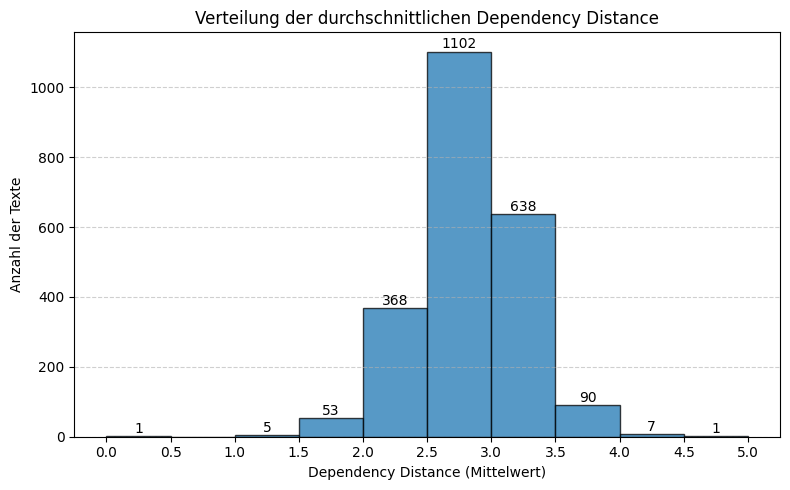

In [34]:

dd_means = df['dependency_distance'].apply(lambda d: d['dependency_distance_mean'])


bins = np.arange(0, 5.5, 0.5)


fig, ax = plt.subplots(figsize=(8, 5))
counts, edges, bars = ax.hist(dd_means, bins=bins, edgecolor='black', alpha=0.75)


for count, bar in zip(counts, bars):
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,  # Abstand über dem Balken
            f'{int(count)}',
            ha='center', va='bottom', fontsize=10
        )

ax.set_xticks(bins)
ax.set_xlabel("Dependency Distance (Mittelwert)")
ax.set_ylabel("Anzahl der Texte")
ax.set_title("Verteilung der durchschnittlichen Dependency Distance")
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("dependency_distance_histogram.png", dpi=300, bbox_inches='tight')
plt.show()


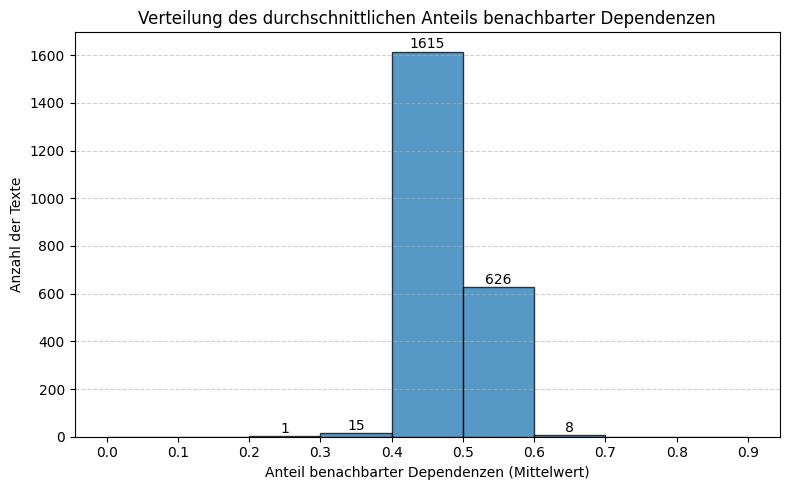

In [35]:

padr_means = df['dependency_distance'].apply(lambda d: d['prop_adjacent_dependency_relation_mean'])

bins = np.arange(0, 1, 0.1)

fig, ax = plt.subplots(figsize=(8, 5))
counts, edges, bars = ax.hist(padr_means, bins=bins, edgecolor='black', alpha=0.75)

for count, bar in zip(counts, bars):
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,  # Abstand über dem Balken
            f'{int(count)}',
            ha='center', va='bottom', fontsize=10
        )

ax.set_xticks(bins)
ax.set_xlabel("Anteil benachbarter Dependenzen (Mittelwert)")
ax.set_ylabel("Anzahl der Texte")
ax.set_title("Verteilung des durchschnittlichen Anteils benachbarter Dependenzen")
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("Anteil-Benachbarter-Dependenzen.png", dpi=300, bbox_inches='tight')
plt.show()

Dieser Einblick in die Daten soll an der Stelle genügen. Im Notebook [Evaluation](./Evaluation.ipynb) wird die bestehende Genderassistenz getestet.